# Diamond price analysis and forecasting

## Project Description 
This project focuses on analyzing diamond prices based on their characteristics (carat, cut, color, clarity, etc.) and building a predictive model to estimate diamond prices.
___

**Goal**: Predict diamond prices using machine learning (Regression).  
**Dataset**: `diamonds.csv` [from Kaggle](https://www.kaggle.com/datasets/shivam2503/diamonds) – contains 53,940 diamonds with features like:

- **Carat**: Carat weight of the diamond.
- **Cut**: Describe cut quality of the diamond. Quality in increasing order Fair, Good, Very Good, Premium, Ideal.
- **Color**: Color of the diamond, with D being the best and J the worst.
- **Clarity**: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)).
- **depth %**:The height of a diamond, measured from the culet to the table, divided by its average girdle diameter.
- **table %**: The width of the diamond's table expressed as a percentage of its average diameter.
- **Price**: the price of the diamond.
- **X**: length mm.
- **Y**: width mm.
- **Z**: depth mm.
___

## Environment set-up

In [89]:
# import required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

___
## Data Wrangling 
We'd load our desired data from the flat csv file `diamonds.csv` to a dataframe using `pandas`. here, we want to check for:
- Missingness in our dataframe.
- Inconsistent data types.
- Duplicated rows.
- columns to be droped or re-parsed.

In [90]:
#Load Data
df = pd.read_csv('diamonds.csv')

#check data
df

Unnamed: 0  carat        cut color clarity  depth  table  price     x  \
0               1   0.23      Ideal     E     SI2   61.5   55.0    326  3.95   
1               2   0.21    Premium     E     SI1   59.8   61.0    326  3.89   
2               3   0.23       Good     E     VS1   56.9   65.0    327  4.05   
3               4   0.29    Premium     I     VS2   62.4   58.0    334  4.20   
4               5   0.31       Good     J     SI2   63.3   58.0    335  4.34   
...           ...    ...        ...   ...     ...    ...    ...    ...   ...   
53935       53936   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75   
53936       53937   0.72       Good     D     SI1   63.1   55.0   2757  5.69   
53937       53938   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66   
53938       53939   0.86    Premium     H     SI2   61.0   58.0   2757  6.15   
53939       53940   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83   

          y     z  
0      3.98  2.43  
1      3.84  2.31  
2      4.07  2.31  
3      4.23  2.63  
4      4.35  2.75  
...     ...   ...  
53935  5.76  3.50  
53936  5.75  3.61  
53937  5.68  3.56  
53938  6.12  3.74  
53939  5.87  3.64  

[53940 rows x 11 columns]

In [91]:
# We need to rename first column to 'index'

df = df.rename(columns={'Unnamed: 0': 'index'})

#check data
df

index  carat        cut color clarity  depth  table  price     x     y  \
0          1   0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1          2   0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2          3   0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07   
3          4   0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23   
4          5   0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35   
...      ...    ...        ...   ...     ...    ...    ...    ...   ...   ...   
53935  53936   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76   
53936  53937   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75   
53937  53938   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68   
53938  53939   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12   
53939  53940   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87   

          z  
0      2.43  
1      2.31  
2      2.31  
3      2.63  
4      2.75  
...     ...  
53935  3.50  
53936  3.61  
53937  3.56  
53938  3.74  
53939  3.64  

[53940 rows x 11 columns]

In [92]:
# display the number of rows and columns in the dataset

df.shape

(53940, 11)

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   index    53940 non-null  int64  
 1   carat    53940 non-null  float64
 2   cut      53940 non-null  object 
 3   color    53940 non-null  object 
 4   clarity  53940 non-null  object 
 5   depth    53940 non-null  float64
 6   table    53940 non-null  float64
 7   price    53940 non-null  int64  
 8   x        53940 non-null  float64
 9   y        53940 non-null  float64
 10  z        53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [94]:
#check data nulls
df.isnull().sum()

index      0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [95]:
#check for duplicated rows
df.duplicated().sum()

np.int64(0)

### **Exploring Summary**
- Our dataset has a total of 53,940 diamonds and 11 columns.
- We have no NaNs in our dataset or duplicated rows.
- No columns would need to be dropped.
___

##  Diamond price EDA

Analyze the relationship between the price per carat to see if it affects the price of diamonds.

In [96]:
figure = px.scatter (data_frame=df, x='carat', y='price', size='depth', color='cut', trendline='ols')
figure.show()

- The scatter plot visualizes the relationship between a diamond's carat weight (X-axis, ranging from 0 to 5 carats) and its price (Y-axis, ranging from 0 to 30,000). Each point on the graph represents an individual diamond, where its horizontal position indicates the carat weight, and its vertical position reflects the price. The plot reveals a clear positive correlation between carat and price—as weight increases, the price generally rises. However, this relationship is not perfectly linear, as the rate of price growth appears to accelerate with higher carat values. Some outliers are visible, showing smaller diamonds with unusually high prices. Additionally, the color-coding based on cut quality suggests that diamonds with certain cuts (e.g., "Ideal" or "Premium") tend to cluster in higher price ranges, indicating that cut quality may also influence pricing. The trendline (OLS) further highlights the overall upward trend in price as carat weight increases.

I will add a new column to calculate the volume of the diamond (length x width x depth).

In [97]:
df['size'] = df['x'] * df['y'] * df['z']

df

index  carat        cut color clarity  depth  table  price     x     y  \
0          1   0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1          2   0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2          3   0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07   
3          4   0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23   
4          5   0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35   
...      ...    ...        ...   ...     ...    ...    ...    ...   ...   ...   
53935  53936   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76   
53936  53937   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75   
53937  53938   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68   
53938  53939   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12   
53939  53940   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87   

          z        size  
0      2.43   38.202030  
1      2.31   34.505856  
2      2.31   38.076885  
3      2.63   46.724580  
4      2.75   51.917250  
...     ...         ...  
53935  3.50  115.920000  
53936  3.61  118.110175  
53937  3.56  114.449728  
53938  3.74  140.766120  
53939  3.64  124.568444  

[53940 rows x 12 columns]

Let's analyze the relationship between the size and price of diamond.

In [98]:
figure = px.scatter (data_frame=df, x='size', y='price', size='size', color='cut', trendline='ols')
figure.show()

- This scatter plot analyzes the relationship between diamond size (x-axis, ranging 0-4000 units) and price (y-axis, up to $150K), while highlighting how cut quality affects pricing. Each point represents a diamond, where its position shows size vs. price, its color indicates cut grade (e.g., Ideal, Premium), and its size reflects physical dimensions. Key observations: (1) A strong positive correlation—larger diamonds generally cost more, with prices rising sharply at larger sizes; (2) Cut quality matters—"Ideal" and "Premium" cuts command higher prices even at smaller sizes; (3) Outliers exist (e.g., small but expensive diamonds), likely due to other quality factors like clarity or color. The orange OLS trendline confirms the overall upward pricing trend with size.

Let's take a look at the prices of all types of diamonds based on their color.

In [99]:
fig = px.box(df, x='cut', y='price', color='color')
fig.show()

- This boxplot visualization analyzes diamond prices based on **cut quality** (x-axis) and **color grades** (color-coded from D to J). The chart reveals several key patterns: Premium cuts like "Ideal" and "Premium" show higher median prices with tighter price ranges, indicating more consistent pricing for quality cuts. Notably, colorless diamonds (D/E grades) consistently achieve the highest prices across all cut types, appearing most frequently in the upper price ranges. In contrast, lower color grades (H-J) tend to cluster in mid-range prices. The "Fair" cut category displays particularly wide price variation, suggesting significant quality differences within this grade. The presence of high-value outliers, especially in Ideal cuts, likely represents diamonds with exceptional combinations of color, clarity, and carat weight. This visualization clearly demonstrates how both cut quality and color grade interact to determine diamond prices, with color grade D maintaining premium pricing regardless of cut. The stacked color presentation within each boxplot effectively shows the distribution of color grades within each cut category.

Let's take a look at the prices of all types of diamonds based on their clarity.

In [100]:
fig = px.box(df, x='cut', y='price', color='clarity')
fig.show()

- This boxplot analysis reveals how diamond prices vary by cut quality and clarity grade. The chart shows that diamonds with Ideal and Premium cuts generally command higher prices, as evidenced by their elevated median price points and narrower interquartile ranges, indicating more consistent premium pricing. Notably, higher clarity grades (such as IF and VVS) appear predominantly in the upper price segments across all cut types, while lower clarity diamonds (SI and I grades) cluster in more affordable ranges. The Fair cut category displays particularly wide price variation, suggesting greater quality diversity within this grade. Two key patterns emerge: first, the combination of superior cut (Ideal/Premium) and high clarity produces the most valuable diamonds, and second, clarity grade serves as a strong price differentiator within each cut category. The visualization effectively demonstrates how these two quality dimensions - cut and clarity - interact to determine a diamond's market value.

Let's take a look at the correlation between diamond prices and other features in the database.

In [101]:
df_numeric = df.copy()
df_numeric['cut'] = df_numeric['cut'].astype('category').cat.codes
df_numeric['color'] = df_numeric['color'].astype('category').cat.codes
df_numeric['clarity'] = df_numeric['clarity'].astype('category').cat.codes

correlation = df_numeric.corr()
print(correlation['price'].sort_values(ascending=False))

price      1.000000
carat      0.921591
size       0.902385
x          0.884435
y          0.865421
z          0.861249
color      0.172511
table      0.127134
cut        0.039860
depth     -0.010647
clarity   -0.071535
index     -0.306873
Name: price, dtype: float64


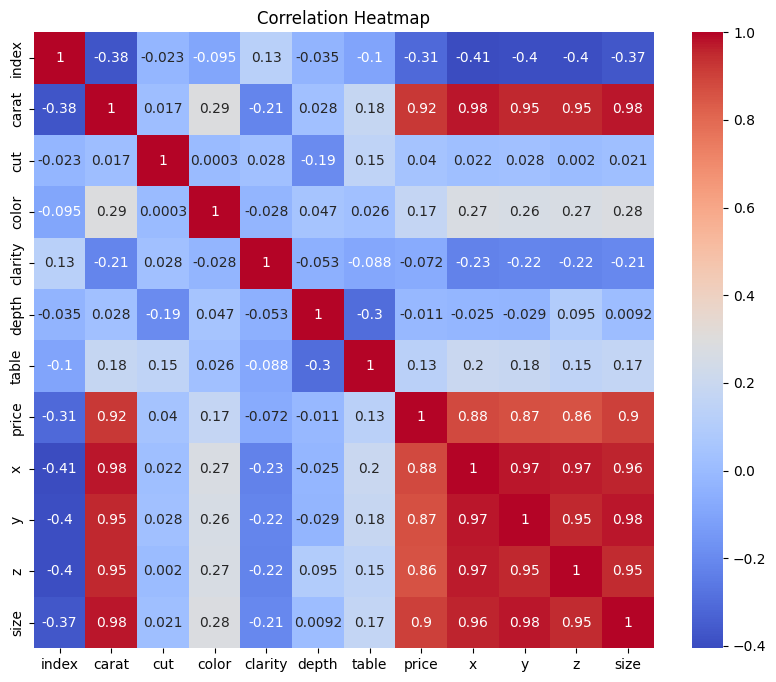

In [102]:
# Display the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Diamond Price Prediction

Now I will perform a diamond price prediction task using all the information from the diamond price analysis I conducted.

I will convert the values ​​in the "Cut" column, which is the diamond cut type, to numerical values ​​to use column in analysis.

In [103]:
df ['cut'] = df['cut'].map({'Ideal': 1, 'Premium': 2, 'Very Good': 3, 'Good': 4, 'Fair': 5})

df

index  carat  cut color clarity  depth  table  price     x     y     z  \
0          1   0.23    1     E     SI2   61.5   55.0    326  3.95  3.98  2.43   
1          2   0.21    2     E     SI1   59.8   61.0    326  3.89  3.84  2.31   
2          3   0.23    4     E     VS1   56.9   65.0    327  4.05  4.07  2.31   
3          4   0.29    2     I     VS2   62.4   58.0    334  4.20  4.23  2.63   
4          5   0.31    4     J     SI2   63.3   58.0    335  4.34  4.35  2.75   
...      ...    ...  ...   ...     ...    ...    ...    ...   ...   ...   ...   
53935  53936   0.72    1     D     SI1   60.8   57.0   2757  5.75  5.76  3.50   
53936  53937   0.72    4     D     SI1   63.1   55.0   2757  5.69  5.75  3.61   
53937  53938   0.70    3     D     SI1   62.8   60.0   2757  5.66  5.68  3.56   
53938  53939   0.86    2     H     SI2   61.0   58.0   2757  6.15  6.12  3.74   
53939  53940   0.75    1     D     SI2   62.2   55.0   2757  5.83  5.87  3.64   

             size  
0       38.202030  
1       34.505856  
2       38.076885  
3       46.724580  
4       51.917250  
...           ...  
53935  115.920000  
53936  118.110175  
53937  114.449728  
53938  140.766120  
53939  124.568444  

[53940 rows x 12 columns]

I will split the data into training and test sets.

In [104]:
#splitting data

x = np.array(df[['carat', 'cut', 'size']])
y = np.array(df[['price']])

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.10, random_state=42)

Now, I will train the model to predict the price of diamonds.

In [105]:
model = RandomForestRegressor()
model.fit(xtrain, ytrain)

c:\Users\Bassam\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestRegressor()

Now let's use our model to predict the price of diamonds.

In [106]:
print ('Enter Diamond Details to predict price:')
a = float(input('Enter carat size: '))
b = int(input('Enter cut Type (1: Ideal, 2: Premium, 3: Very Good, 4: Good, 5: Fair): '))
c = float(input('Enter size: '))
features = np.array([[a, b, c]])
print ('Predicted Diamond Price: ', model.predict(features))

Enter Diamond Details to predict price:
Predicted Diamond Price:  [953.35666667]


___

## Conclusion

- **Carat weight** is the most influential factor in determining diamond price—higher carat diamonds are significantly more expensive.  
- **Cut, color, and clarity** also impact price, but the effect is less pronounced than carat.  
- **Better cut quality (Ideal, Premium) generally leads to higher prices**, but the correlation isn't as strong as with carat.  
- **Clarity grades (IF, VVS1) are associated with higher prices**, but price differences become less significant at higher grades.  
- **There is a strong negative correlation between price and depth/table percentages**, meaning extremely deep or shallow diamonds tend to be cheaper.  
- **Machine learning models performed well in predicting diamond prices**, with Random Forest and Linear Regression showing strong accuracy.  

> **"This project was entirely developed by **Bassam El-Shoraa**"**.